## Importing Important packages

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten

import os

from sklearn.model_selection import train_test_split

## Data Loading and Prepare it to feed in model

In [2]:
data = pd.read_csv('driving_log.csv',names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

In [3]:
data

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,0.0,0.0,0.0,7.660739
1,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,0.0,0.0,0.0,7.599172
2,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,0.0,0.0,0.0,7.538100
3,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,0.0,0.0,0.0,7.477519
4,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,0.0,0.0,0.0,7.432402
...,...,...,...,...,...,...,...
1065,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,0.0,0.0,0.0,2.845060
1066,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,0.0,0.0,0.0,2.827871
1067,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,0.0,0.0,0.0,2.805138
1068,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...,0.0,0.0,0.0,2.782597


In [4]:
X = data[['center', 'left', 'right']].values

In [5]:
X

array([['C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\center_2022_11_02_22_50_56_223.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\left_2022_11_02_22_50_56_223.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\right_2022_11_02_22_50_56_223.jpg'],
       ['C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\center_2022_11_02_22_50_56_303.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\left_2022_11_02_22_50_56_303.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\right_2022_11_02_22_50_56_303.jpg'],
       ['C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\center_2022_11_02_22_50_56_377.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\left_2022_11_02_22_50_56_377.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\right_2022_11_02_22_50_56_377.jpg'],
       ...,
       ['C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\center_2022_11_02_22_52_14_701.

In [17]:
img1 = mpimg.imread(X[0][0])
img2 = mpimg.imread(X[0][1])
img3 = mpimg.imread(X[0][2])

img1.shape

(160, 320, 3)

In [13]:
img1, img2, img3

(array([[[127, 157, 207],
         [127, 157, 207],
         [126, 156, 206],
         ...,
         [105, 134, 166],
         [105, 134, 166],
         [105, 134, 166]],
 
        [[127, 157, 207],
         [127, 157, 207],
         [127, 158, 205],
         ...,
         [105, 134, 168],
         [105, 134, 168],
         [105, 134, 168]],
 
        [[128, 159, 206],
         [128, 159, 206],
         [128, 159, 206],
         ...,
         [106, 134, 171],
         [106, 134, 171],
         [106, 134, 171]],
 
        ...,
 
        [[123, 128, 121],
         [129, 134, 127],
         [139, 144, 137],
         ...,
         [ 76,  79,  70],
         [ 91,  94,  85],
         [ 88,  91,  82]],
 
        [[123, 128, 121],
         [149, 154, 147],
         [192, 197, 190],
         ...,
         [ 84,  87,  78],
         [ 84,  87,  78],
         [ 88,  91,  82]],
 
        [[104, 109, 102],
         [121, 126, 119],
         [122, 127, 120],
         ...,
         [ 89,  92,  83],
  

Text(0.5, 1.0, 'Right')

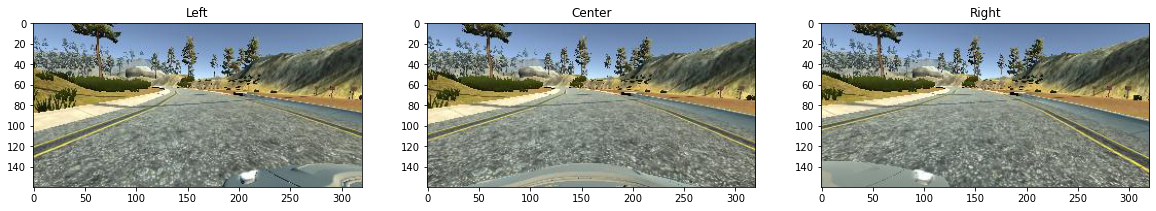

In [34]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1)
plt.imshow(img2)
plt.title("Left")

fig.add_subplot(1, 3, 2)
plt.imshow(img1)
plt.title("Center")

fig.add_subplot(1, 3, 3)
plt.imshow(img3)
plt.title("Right")

In [14]:
y = data['steering'].values

In [7]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,random_state=32)

In [16]:
X_train

array([['C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\center_2022_11_02_22_51_01_455.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\left_2022_11_02_22_51_01_455.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\right_2022_11_02_22_51_01_455.jpg'],
       ['C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\center_2022_11_02_22_51_27_411.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\left_2022_11_02_22_51_27_411.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\right_2022_11_02_22_51_27_411.jpg'],
       ['C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\center_2022_11_02_22_51_41_536.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\left_2022_11_02_22_51_41_536.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\right_2022_11_02_22_51_41_536.jpg'],
       ...,
       ['C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\center_2022_11_02_22_51_02_813.

# Model Architecture

## Model used by NVIDIA

    Image normalization to avoid saturation and make gradients work better.
    
    Convolution: 5x5, filter: 24, strides: 2x2, activation: ELU
    Convolution: 5x5, filter: 36, strides: 2x2, activation: ELU
    Convolution: 5x5, filter: 48, strides: 2x2, activation: ELU
    Convolution: 3x3, filter: 64, strides: 1x1, activation: ELU
    Convolution: 3x3, filter: 64, strides: 1x1, activation: ELU
    Drop out (0.5)
    Fully connected: neurons: 100, activation: ELU
    Fully connected: neurons: 50, activation: ELU
    Fully connected: neurons: 10, activation: ELU
    Fully connected: neurons: 1 (output)
    
    # the convolution layers are meant to handle feature engineering
    the fully connected layer for predicting the steering angle.
    dropout avoids overfitting
    ELU(Exponential linear unit) function takes care of the Vanishing gradient problem. 

In [18]:
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66, 200, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

In [19]:
def batch_generator(data_dir, image_paths, steering_angles, batch_size, is_training):
    """
    Generate training image give image paths and associated steering angles
    """
    images = np.empty([batch_size, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])
    steers = np.empty(batch_size)
    while True:
        i = 0
        for index in np.random.permutation(image_paths.shape[0]):
            center, left, right = image_paths[index]
            steering_angle = steering_angles[index]
            # argumentation
            if is_training and np.random.rand() < 0.6:
                image, steering_angle = augument(data_dir, center, left, right, steering_angle)
            else:
                image = load_image(data_dir, center) 
            # add the image and steering angle to the batch
            images[i] = preprocess(image)
            steers[i] = steering_angle
            i += 1
            if i == batch_size:
                break
        yield images, steers

In [23]:
from keras import backend as K
K.set_image_dim_ordering('th')

AttributeError: module 'keras.backend' has no attribute 'set_image_dim_ordering'

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_5 (Lambda)            (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 40, 24)        1824      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 8, 36)          21636     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 2, 48)          43248     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 1, 1, 64)          27712     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 1, 1, 64)          36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 64)         

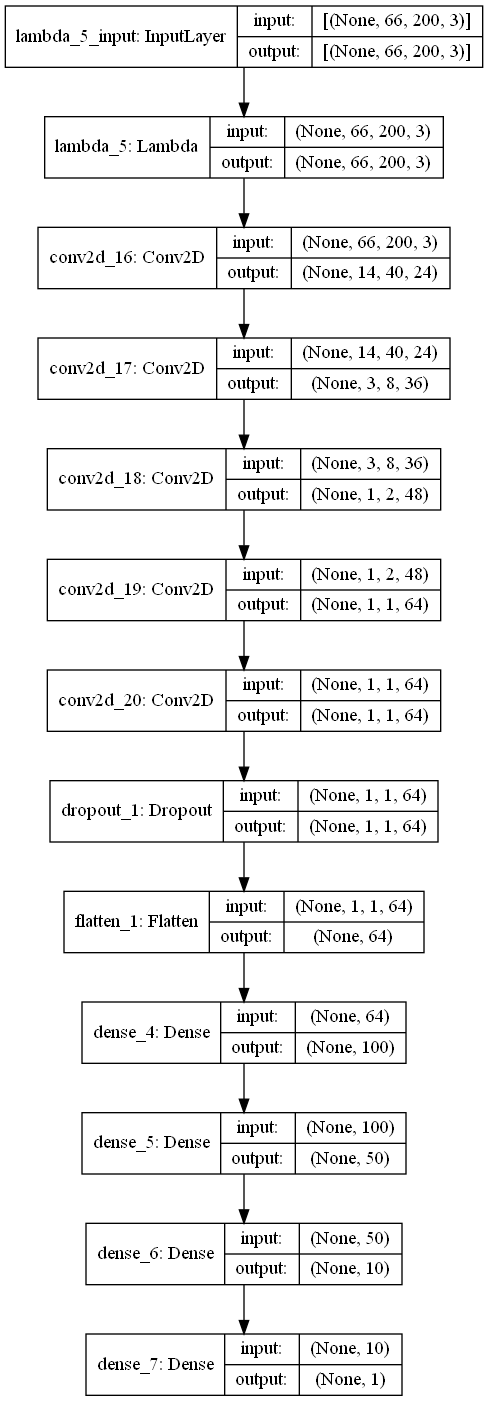

In [27]:
model = Sequential()
model.add(Lambda(lambda x: x/127.5-1.0, input_shape=INPUT_SHAPE))
model.add(Conv2D(24, 5, 5, activation='elu',padding='same'))
model.add(Conv2D(36, 5, 5, activation='elu',padding='same'))
model.add(Conv2D(48, 5, 5, activation='elu',padding='same'))
model.add(Conv2D(64, 3, 3, activation='elu',padding='same'))
model.add(Conv2D(64, 3, 3, activation='elu',padding='same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1))

model.summary()
keras.utils.plot_model(model, show_shapes=True, to_file='model.png')